<a href="https://colab.research.google.com/github/KadimelllaAnushaRaju/MLnow_2.0/blob/main/assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Link to Download the dataset](https://www.kaggle.com/hdawkins/student-performance)

**Date Created**: June , 2021

Topic: Univariate Linear Regression

**Author**:ANUSHA RAJU

[[Assessment Repository](https://github.com/KadimelllaAnushaRaju/MLnow_2.0)]

In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
cd '/content/drive/MyDrive/assignment1/students_exam'

/content/drive/MyDrive/assignment1/students_exam


In [67]:
ls

response_data.csv  response_merge.gdoc  response_merge.txt  school_data.csv


In [68]:
import os

In [69]:
import pandas as pd #working with csv or excel files
import numpy as np #working with numbers/ arrays/ tensors
import tensorflow as tf #framework
from tensorflow import keras #API / library 
import os #using os commands between the python language

In [70]:
mathData = pd.read_csv('school_data.csv', sep=',') #load the csv file as dataframe

In [71]:
mathData.head(10) #print the first ten rows of the dataframe

,School,School_ID,Board,Board_ID,Num_students,Level1,Level2,Level3,Level4,NumF,NumM,Numresponses
0,Agincourt CI,890723,Toronto DSB,66052,263,1,7,73,18,138,125,237
1,Albert Campbell CI,890880,Toronto DSB,66052,250,6,10,70,13,116,134,182
2,Applewood Heights SS,892203,Peel District School Board,66125,184,8,11,74,4,89,95,172
3,Birchmount Park CI,895016,Toronto DSB,66052,127,6,23,66,2,53,74,116
4,Bramalea SS,895920,Peel District School Board,66125,165,9,18,68,4,67,98,114
5,Brampton Centennial SS,896055,Peel District School Board,66125,151,6,8,77,9,70,81,141
6,C W Jefferys CI,897744,Toronto DSB,66052,109,17,23,50,7,51,58,101
7,Cameron Heights CI,898090,Waterloo Region DSB,66176,348,3,7,70,19,196,152,300
8,Rosedale Heights School of the Arts,898910,Toronto DSB,66052,185,6,12,76,4,150,35,172
9,Cawthra Park SS,899003,Peel District School Board,66125,305,2,5,73,20,213,92,293


In [80]:
uniMathData = mathData[["Level1", "Level4"]]
uniMathData.head(5)

,Level1,Level4
0,1,18
1,6,13
2,8,4
3,6,2
4,9,4


In [75]:
uniMathData.to_csv('univariate_MathData_2.csv')

In [76]:
ls

response_data.csv    response_merge.txt  univariate_MathData_2.csv
response_merge.gdoc  school_data.csv


In [78]:
#Data visualization

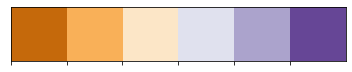

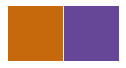

In [77]:
import seaborn as sns
sns.palplot(sns.color_palette('PuOr')) #Purple to Orange colors
pal = sns.color_palette('PuOr', 6) #print 6 color shades from Purple to Orange
pal.as_hex() #set hex code values for colors

import matplotlib.pyplot as plt
plt.style.use(['seaborn'])
sns_colors = ['#c6690c', '#664697'] #orange Purple hex codes
sns.set_palette(sns_colors) #set the palette as sns_colors 
sns.palplot(sns.color_palette(sns_colors)) #plot the color codes


In [79]:
uniMathData.columns #columns in the dataframe

Index(['Level1', 'Level4'], dtype='object')

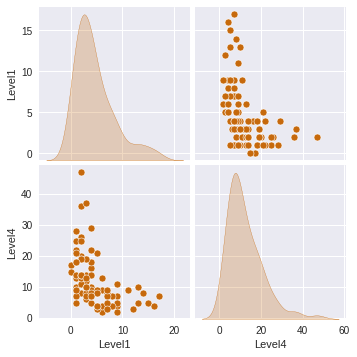

In [81]:
#pairplot for all the values

sns.pairplot(uniMathData,
             x_vars = ["Level1", "Level4"],
             y_vars =  ["Level1", "Level4"],
       diag_kind='kde'
             )

In [82]:
#80-20 train-test percent split

trainDataset = uniMathData.sample(frac=0.8, random_state=0) 
testDataset = uniMathData.drop(trainDataset.index)

print(trainDataset.head())
print(testDataset.head())

    Level1  Level4
2        8       4
13       3      14
53       4      22
41       7       5
74       3      37
    Level1  Level4
9        2      20
12       9       7
21       1       7
25       1      18
36      12       3


In [83]:
print(trainDataset.shape)
print(testDataset.shape)

(69, 2)
(17, 2)


In [84]:

#copy the trainDataset dataframe for getting the features

trainFeatures = trainDataset.copy()
testFeatures = testDataset.copy()

print(trainFeatures.head())
print(testFeatures.head())

    Level1  Level4
2        8       4
13       3      14
53       4      22
41       7       5
74       3      37
    Level1  Level4
9        2      20
12       9       7
21       1       7
25       1      18
36      12       3


In [87]:
#removing the G3 column and saving it into the labels variable

trainLabels = trainFeatures.pop('Level4')
testLabels = testFeatures.pop('Level4')

print(trainLabels.head())
print(testLabels.head())

2      4
13    14
53    22
41     5
74    37
Name: Level4, dtype: int64
9     20
12     7
21     7
25    18
36     3
Name: Level4, dtype: int64


In [140]:
print(trainFeatures.head())
print(testFeatures.head())

    Level1
2        8
13       3
53       4
41       7
74       3
    Level1
9        2
12       9
21       1
25       1
36      12


In [141]:
# univariate -> num(features) = 1
# multvariate -> num(features) > 1 = 11


model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)

])

In [142]:
model.compile(
    loss = 'mean_absolute_error', #minimizing the MAE loss
    optimizer = tf.keras.optimizers.Adam(0.001), #learning rate specified as 0.001
    # optimizer = 'adam', #takes the default learning rate
    metrics = ['mae', 'mse'] #meanSquare and meanAbsolute error metrics
)

In [161]:
numEpochs = 300
history = model.fit(x = trainFeatures, y = trainLabels, validation_data = (testFeatures, testLabels), epochs = numEpochs)

Epoch 1/300
3/3 [==============================] - 0s 27ms/step - loss: 8.5736 - mae: 8.5736 - mse: 143.3037 - val_loss: 5.6019 - val_mae: 5.6019 - val_mse: 52.7782
Epoch 2/300
3/3 [==============================] - 0s 11ms/step - loss: 8.5724 - mae: 8.5724 - mse: 143.2726 - val_loss: 5.6006 - val_mae: 5.6006 - val_mse: 52.7626
Epoch 3/300
3/3 [==============================] - 0s 12ms/step - loss: 8.5711 - mae: 8.5711 - mse: 143.2455 - val_loss: 5.5997 - val_mae: 5.5997 - val_mse: 52.7555
Epoch 4/300
3/3 [==============================] - 0s 11ms/step - loss: 8.5697 - mae: 8.5697 - mse: 143.2239 - val_loss: 5.5986 - val_mae: 5.5986 - val_mse: 52.7451
Epoch 5/300
3/3 [==============================] - 0s 11ms/step - loss: 8.5685 - mae: 8.5685 - mse: 143.1980 - val_loss: 5.5973 - val_mae: 5.5973 - val_mse: 52.7296
Epoch 6/300
3/3 [==============================] - 0s 11ms/step - loss: 8.5671 - mae: 8.5671 - mse: 143.1692 - val_loss: 5.5960 - val_mae: 5.5960 - val_mse: 52.7155
Epoch 7/30

In [162]:

print(history)

In [163]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


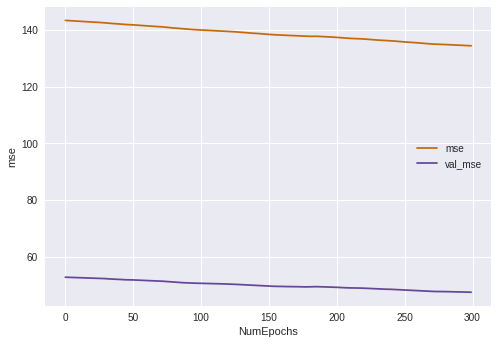

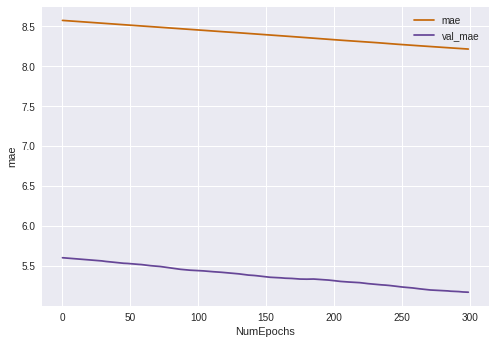

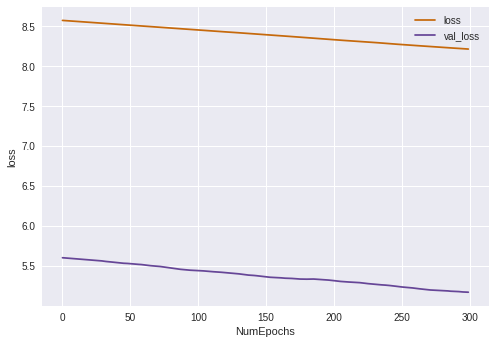

In [164]:

# tempString = 'mse'
def curvePlots(tempString):
  plt.plot(history.history[tempString])
  plt.plot(history.history[f'val_{tempString}'])
  plt.xlabel('NumEpochs')
  plt.ylabel(tempString)
  plt.legend([tempString, f'val_{tempString}'])
  plt.show()


curvePlots('mse')
curvePlots('mae')
curvePlots('loss')

In [149]:
model.predict([1])

array([[2.8020759]], dtype=float32)

In [150]:
# testPreds = model.predict(testFeatures).flatten() #array of all prediction values

#for single values

print(f'Prediction for input value 1: {model.predict([1])}')


# for a list of values
tempListforPreds = [1,2,3,4,5]
print(f'''

input List = {tempListforPreds}


List of Predictions:
{model.predict(tempListforPreds)}

List of Predictions (flattened out):
{model.predict(tempListforPreds).flatten()}
''')

Prediction for input value 1: [[2.8020759]]


input List = [1, 2, 3, 4, 5]


List of Predictions:
[[2.8020759]
 [3.4030974]
 [4.004119 ]
 [4.6051407]
 [5.2061625]]

List of Predictions (flattened out):
[2.8020759 3.4030974 4.004119  4.6051407 5.2061625]



In [151]:
print(testFeatures)

    Level1
9        2
12       9
21       1
25       1
36      12
37       4
39       4
44       5
46       2
47       3
58       1
64       3
65       3
67       5
70       5
80       4
82       3


In [152]:

testPreds = model.predict(testFeatures).flatten() #array of all prediction values

In [153]:

print(len(testPreds))
print(testPreds)

17
[3.4030974 7.610249  2.8020759 2.8020759 9.413314  4.6051407 4.6051407
 5.2061625 3.4030974 4.004119  2.8020759 4.004119  4.004119  5.2061625
 5.2061625 4.6051407 4.004119 ]


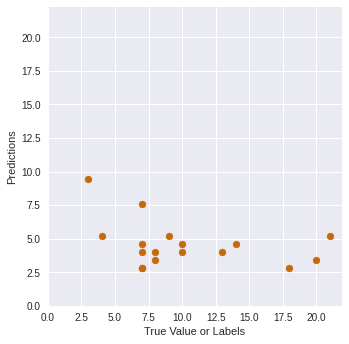

In [166]:
# prediciton plot --> how well is your model predicting across the actual labels

def predPlot(labels, predictions):
  plt.scatter(labels, predictions)
  plt.ylabel('Predictions')
  plt.xlabel('True Value or Labels')
  plt.axis('equal')
  plt.axis('square')
  plt.xlim([0, plt.xlim()[1]])
  plt.ylim([0, plt.ylim()[1]])
  plt.show()

predPlot(testLabels, testPreds)

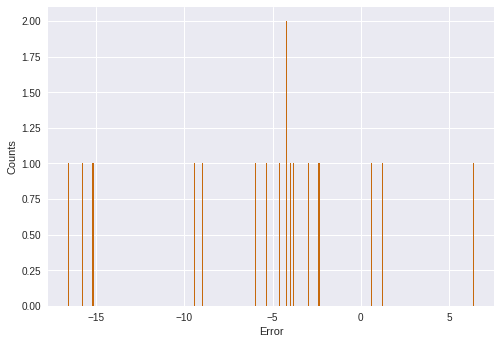

In [167]:
#error plot --> gaussian distribution 

def errorPlot(preds, labels, counts):
  errors = preds - labels
  plt.hist(errors, counts)
  plt.xlabel('Error')
  plt.ylabel('Counts')
  plt.show()

errorPlot(testPreds, testLabels, numEpochs)